# Final Code

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score,  precision_score, recall_score, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# importing labeld data
df=pd.read_csv(r'C:\Users\p_uli\Desktop\Columbia University\Cursos\Fall 22\Capstone\Data\split_threads_sample_anotated.csv')

In [3]:
df.head()

,email_id,subject,email,has_table,has_disclaimer,has_signature
0,kitchen-l\sent_items\1659#2,"Fw: model, files and apps",#NAME?,0,0,0
1,maggi-m\deleted_items\491#6,\tRE:,"no she doesnt, ready?",0,0,0
2,love-p\all_documents\244#1,Re: Things that mess with your mind,You finally win a game and you think your team...,0,0,0
3,watson-k\inbox\103#1,"\tReliant Energy Services, Inc., Contract #268...",CAPACITY REQUESTED\n\nAmendment #17\n\nSHIPPER...,1,0,0
4,sager-e\all_documents\1296#1,TVA letter,NaN,0,0,0


In [4]:
df['email'].replace('', np.nan, inplace=True)
df.dropna(subset=['email'], inplace=True)

In [5]:
df.shape

(290, 6)

In [6]:
df.head()

,email_id,subject,email,has_table,has_disclaimer,has_signature
0,kitchen-l\sent_items\1659#2,"Fw: model, files and apps",#NAME?,0,0,0
1,maggi-m\deleted_items\491#6,\tRE:,"no she doesnt, ready?",0,0,0
2,love-p\all_documents\244#1,Re: Things that mess with your mind,You finally win a game and you think your team...,0,0,0
3,watson-k\inbox\103#1,"\tReliant Energy Services, Inc., Contract #268...",CAPACITY REQUESTED\n\nAmendment #17\n\nSHIPPER...,1,0,0
5,scott-s\all_documents\1391#1,A.Word.A.Day--abjure,abjure (ab-JOOR) verb tr.\n\n 1. To renounce...,0,0,0


In [7]:
df.reset_index(drop=True,inplace=True)

## Code for signature detection

In [8]:
from tqdm import tqdm
import re
import random
l=[]
for i in range(30):
    n=random.randrange(1,6885)
    l.append(n)
result1=[]
message1=[]
c=0
for index,row in tqdm(df.iterrows()):
    #split the body in lines
    body=row['email'].split('\n')
    #we want that the body is at least 3 lines, otherwise we assume no signature is in place
    if len(body)>3:
        #We chacke if there is an email sign, in case there is we parse the previous three lines every time
        #the assumption is that the signature is at least long 3 lines and has a email symbol
        if '@' in body[len(body)-1] or '@' in body[len(body)-2] or '@' in body[len(body)-3]:
            #if we find the email symbol
            counter=0
            for i in range(1,4):
                #we check all the past lines from the email sign we found (should be enhanced, perhaps the email is
                #the first element in the signature, therefore we are not catching anything going back in. the lines)
                current=body[len(body)-i].lower()
                #we check if a line contains a phone number: 1 numerical string of 4 digits and 2 numerical strings of 3 digits
                cond1=(re.search("\d{4}",current)!=None and re.search("\d{3}",current)==2)
                #we check if the work 'fax' is present
                cond2=('fax' in current.lower())
                #we check that the message we are looking is not already labelled as a signed one in our result
                cond3=row['email_id'] not in result1
                #we check for the key word phone,cell, home in our line to see if there is any
                cond4=('phone' in current or 'cell' in current or 'home' in current)
                #if cond1,cond2,cond4 aare correct, then we increase the counter by 1
                if cond1 or cond2 or cond4:
                    counter+=1
                    #if at least two of the conditions are correct and the email is not yet in the result we put the index
                    #in our result (TO DO enhance)
                    if counter>1 and cond3:
                        result1.append(index)
                        #this is a simple tool to visualize what body we labelled for choosinng a random sample
                        if c in l:
                            print(c)
                            print('xxxxxxxxxxxxxxxxxxxxxx')
                            print(row['email'])
                            print('\n\n')
                        #we append the message id to our message1 (result for the message id)
                        message1.append(row['email_id'])
                        c+=1 

290it [00:00, 13276.74it/s]


In [18]:
result1

[11, 39, 68, 108, 139, 155, 184, 260, 269, 288]

In [10]:
actual= df['has_signature']
predicted= [1 if x in result1 else 0 for x in range(len(actual))]

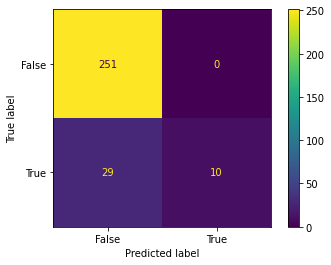

In [11]:
cf_matrix = confusion_matrix(actual, predicted)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [12]:
# accuracy
print('Accuracy: {:.2%}'.format(accuracy_score(actual, predicted)))

# precision
print('Precision: {:.2%}'.format(precision_score(actual, predicted)))

# Recall
print('Recall: {:.2%}'.format(recall_score(actual, predicted)))

# F1
print('F1-score: {:.2%}'.format(f1_score(actual, predicted)))

Accuracy: 90.00%
Precision: 100.00%
Recall: 25.64%
F1-score: 40.82%


## Code for name detection

In [ ]:
from names_dataset import NameDataset, NameWrapper
names=NameDataset()
def detect_name(string, r = 5000, c = 3):
    '''
    Function that returns True if the provided string contains a name (for US present in top 3 countries)
    r: Minimum position in the ranking of popular names/last names in the US
    c: Minimum ranking of popularity of the word as a name/last name in the US
    '''
    words = string.split(" ")
    l = False
    for w in words:

        x = names.search(w)['first_name']
        if x is None:# word not found in names dictionary
            f = False
        elif x['rank']['United States'] is None:# Name no frequent in US
            f = False
        elif x['rank']['United States'] > r:# Name unfrequent in US 
            f = False
        else:
            y = x['country']
            countries_first_name = list({k: v for k, v in sorted(y.items(), key=lambda item: item[1], reverse = True)}.keys())[0:c]
            f = 'United States' in countries_first_name
        
        x = names.search(w)['last_name']
        if x is None:# word not found in names dictionary
            p = False
        elif x['rank']['United States'] is None:# Last name no frequent in US
            p = False
        elif x['rank']['United States'] > r:# Last name unfrequent in US 
            p = False
        else:
            y = x['country']
            countries_last_name = list({k: v for k, v in sorted(y.items(), key=lambda item: item[1], reverse = True)}.keys())[0:c]
            p = 'United States' in countries_last_name     
        
        l = l | ( f | p )
    return l


## Code for salutation detection, To implement

In [ ]:
salutations=[
'My Best',
'My best to you',
'Have a nice day',
'Hope your day is going well',
'Faithfully',
'All Best' ,
'All the best',
'Best Wishes',
'Bests',
'Best Regards',
'Regards',
'Rgds',
'Warm Regards',
'Warmest Regards',
'Warmest',
'Warmly',
'Take care',
'Thanks',
'Thanks so much',
'Thanks!',
'Thank you',
'Thank you!',
'Many thanks',
'Thanks for your consideration',
'Thx',
'Hope this helps',
'Looking forward',
'Rushing',
'In haste',
'Be well',
'Peace',
'Yours Truly',
'Yours',
'Very Truly Yours',
'Sincerely',
'Sincerely Yours',
'Cheers!',
'faithfully'
'Ciao',
'Love',
'Lots of love',
'Hugs',
'High five from down low',
'Take it easy bro',
'See you around',
'Have a wonderful bountiful lustful day',
'Sent from my iPhone',
'Sent from iOS']
#list of common salutations
from tqdm import tqdm
from difflib import SequenceMatcher
#function that tells us how similar two strings are similar
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()
c=False
counter=0
rest=[]
words=[]
for index,row in tqdm(df.iterrows()):
    #split the body in lines
    body=row['body'].split('\n')
    #check if the body is at least three (could be avoided in this case)
    if len(body)>3:
        #for line in the body 
        for j,line in enumerate(body):
            #if we are in the bottom half of the email we go forth. Assumption: salutation are in the bottom half
            if j>(1.5*len(body))/3:
                #if the line is less than 4 items, (probably a salutation) and the previous line is empty
                if len(line.split())<=4 and body[j-1]=='':
                    #for each word on the line
                    for item_word in line.split():
                        #we determine if there is a name (not necessary perhaps for the function)
                        if detect_name(item_word):
                            #if there is a name we check
                            print(row['body'])
                            print(item_word)
                            #put line as test this works 
                    #for each item in salutation
                    for item in salutations:
                        #we wliminate anything that is punctuation or not letters,/numbers
                        s = ''.join(filter(str.isalnum, line))
                        #we get the similarity for each item in the salutation list. If we get good score we go on
                        if similar(s.lower(),item.lower())>0.65:
                            #code for checking any len(3) salutation
                            if len(line.split())==3:
                                    print(s)
                                    print(similar(s.lower(),item.lower()))
                                    print(line)
                                    print(item.lower())
                                    print(row['body'])
                                    print(row['message_id'])
                                    c=True
                                    break
                            #let's count how many email have this salutatiion
                            counter+=1
                            rest.append(row['message_id'])
                            #let's get the word that triggered our salutation to compare
                            words.append(s.lower()+'--------->'+item.lower())
                            #Early stopping system to avoid  (change index for early stopping)
                            if counter==100000000 or index>3000:
                                c=True
        if c==True:
            break 

## Code for hyerarchical topic modeling

In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))["data"]
topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(docs)
hierarchical_topics = topic_model.hierarchical_topics(docs)
hierarchical_topics
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

## Code for table detection

In [26]:
check=False
#There are at least 2 items which are letters and the
resu=[]
message=[]
c=0
C=9
ntab=[]
def validate(s):
    if '#' in s or ':' in s:
        return False
    if 'home' in s.lower() or 'phone' in s.lower() or 'fax' in s.lower() or 'cell' in s.lower():
        return False
    return True
#A list is a table suggestion of splitting 
for index,row in tqdm(df.iterrows()):
    body=row['email'].split('\n')
    for i,item in enumerate(body):
        #ignoring the one lines emails
        if i<(len(body)-1):
            condition3=len(item.split())>2
            condition4=len(body[i+1].split())==len(item.split())
            condition1=((item.count('\t')*4 +item.count(' '))>=(len(item.split())/3) and len(re.findall("\d",item))>=1)
            condition2=(body[i+1].count('\t')*4+body[i+1].count(' '))>=(len((body[i+1]).split())/3) and len(re.findall("\d",body[i+1]))>=1
            if condition3 and condition4 and row['email_id'] not in resu:
                if row['email_id'] in message and i>len(body)-4:
                    break
                start_word_header=[]
                inword=False
                start_word_line=[]
                for j,char in enumerate(item):
                    if inword==False and char.isalnum():
                        inword=True
                        start_word_header.append(j)
                    if inword==True and char.isalnum()==False:
                        inword=False
                inword=False
                for j,char in enumerate(body[i+1]):
                    if inword==False and char.isalnum():
                        inword=True
                        start_word_line.append(j)
                    if inword==True and char.isalnum()==False:
                        inword=False
                table=True
                if len(start_word_line)!=len(start_word_header):
                    break
                counter_number=0
                counter_string=0
                for x in range(len(start_word_line)):
                    if start_word_line[x]!=start_word_header[x]:
                        table=False
                        break
                    else:
                        if item[start_word_line[x]].isnumeric() and body[i+1][start_word_header[x]].isnumeric():
                            counter_number+=1
                        if item[start_word_line[x]].isalpha() and body[i+1][start_word_header[x]].isalpha()==False:
                            counter_string=-1
                if table==True and counter_number>2 and counter_string!=-1:
                    if row['email_id'] not in resu and validate(item) and validate(body[i+1]):
                        #resu.append(row['email_id'])
                        resu.append(index)
                        message.append(row['email_id'])
                        print(row['email_id'])
                        print(start_word_line)
                        print(start_word_header)
                        print(item)
                        print(body[i+1])

290it [00:00, 4575.61it/s]

dasovich-j\all_documents\3061#1
[2, 7, 11, 16]
[2, 7, 11, 16]
>(650) 762 2800 main
>(650) 762 2825 direct


In [40]:
#numeric table approach assumptions:
#tables are separated by long 
check=False
#There are at least 2 items which are letters and the
resu=[]
message=[]
c=0
C=9
ntab=[]
def validate(s):
    if '#' in s or ':' in s:
        return False
    if 'home' in s.lower() or 'phone' in s.lower() or 'fax' in s.lower() or 'cell' in s.lower():
        return False
    return True
#A list is a table suggestion of splitting 
for index,row in tqdm(df.iterrows()):
    body=row['email'].split('\n')
    for i,item in enumerate(body):
        #ignoring the one lines emails
        if i<(len(body)-1):
            condition3=len(item.split())>2
            condition4=len(body[i+1].split())==len(item.split())
            condition1=((item.count('\t')*4 +item.count(' '))>=(len(item.split())/3) and len(re.findall("\d",item))>=1)
            condition2=(body[i+1].count('\t')*4+body[i+1].count(' '))>=(len((body[i+1]).split())/3) and len(re.findall("\d",body[i+1]))>=1
            if condition3 and condition4 and row['email_id'] not in resu:
                #if row['email_id'] in message and i>len(body)-4 and condition2 and condition1:
                if row['email_id'] in resu and i>len(body)-4 and condition2 and condition1:
                    break
                start_word_header=[]
                inword=False
                start_word_line=[]
                for j,char in enumerate(item):
                    if inword==False and char.isalnum():
                        inword=True
                        start_word_header.append(j)
                    if inword==True and char.isalnum()==False:
                        inword=False
                inword=False
                for j,char in enumerate(body[i+1]):
                    if inword==False and char.isalnum():
                        inword=True
                        start_word_line.append(j)
                    if inword==True and char.isalnum()==False:
                        inword=False
                table=True
                if len(start_word_line)!=len(start_word_header):
                    break
                counter_number=0
                counter_string=0
                for x in range(len(start_word_line)):
                    if start_word_line[x]!=start_word_header[x]:
                        table=False
                        break
                    else:
                        if item[start_word_line[x]].isnumeric() and body[i+1][start_word_header[x]].isnumeric():
                            counter_number+=1
                        if item[start_word_line[x]].isalpha() and body[i+1][start_word_header[x]].isalpha()==False:
                            counter_string=-1
                if table==True and counter_number>2 and counter_string!=-1:
                    if row['email_id'] not in resu and validate(item) and validate(body[i+1]):
                        resu.append(row['email_id'])
                        #message.append(row['email_id'])
                        print(row['email_id'])
                        print(start_word_line)
                        print(start_word_header)
                        print(item)
                        print(body[i+1])

290it [00:00, 10971.73it/s]

dasovich-j\all_documents\3061#1
[2, 7, 11, 16]
[2, 7, 11, 16]
>(650) 762 2800 main
>(650) 762 2825 direct


In [36]:
actual_t= df['has_table']
predicted_t= [1 if x in resu else 0 for x in range(len(actual_t))]

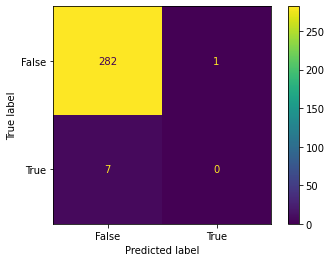

In [37]:
cf_matrix_t = confusion_matrix(actual_t, predicted_t)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cf_matrix_t, display_labels = [False, True])

cm_display.plot()
plt.show()

In [38]:
# accuracy
print('Accuracy: {:.2%}'.format(accuracy_score(actual_t, predicted_t)))

# precision
print('Precision: {:.2%}'.format(precision_score(actual_t, predicted_t)))

# Recall
print('Recall: {:.2%}'.format(recall_score(actual_t, predicted_t)))

# F1
print('F1-score: {:.2%}'.format(f1_score(actual_t, predicted_t)))

Accuracy: 97.24%
Precision: 0.00%
Recall: 0.00%
F1-score: 0.00%


In [32]:
resu

[97]